In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [6]:
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

In [7]:
X = data.drop('0',axis = 1)
y = data['0']

In [8]:
X, y = shuffle(X, y)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [9]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

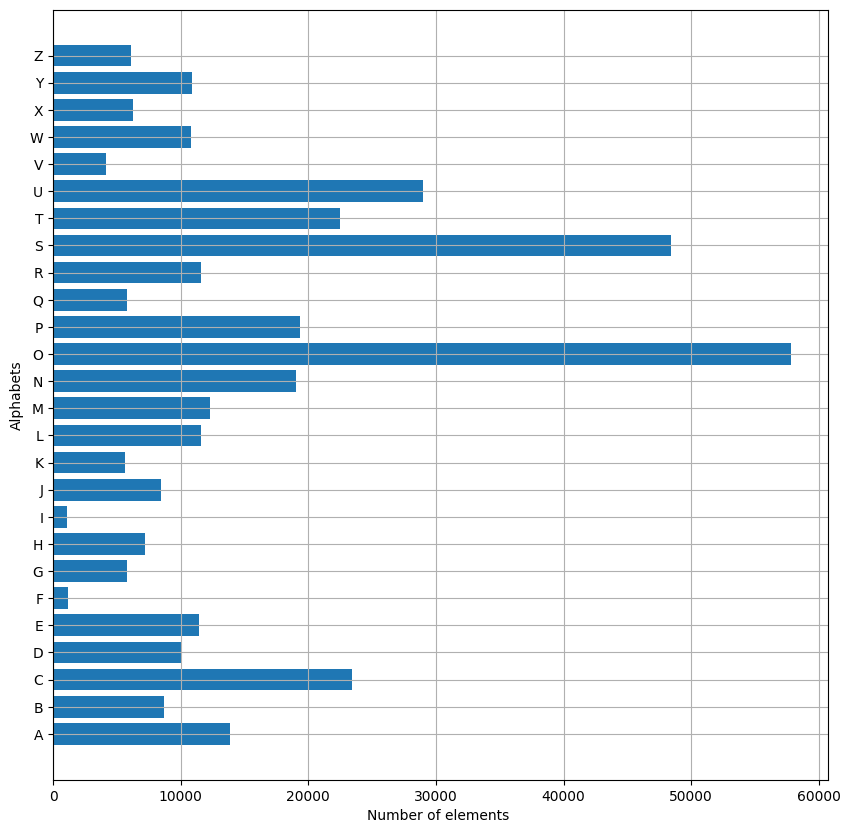

In [10]:
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

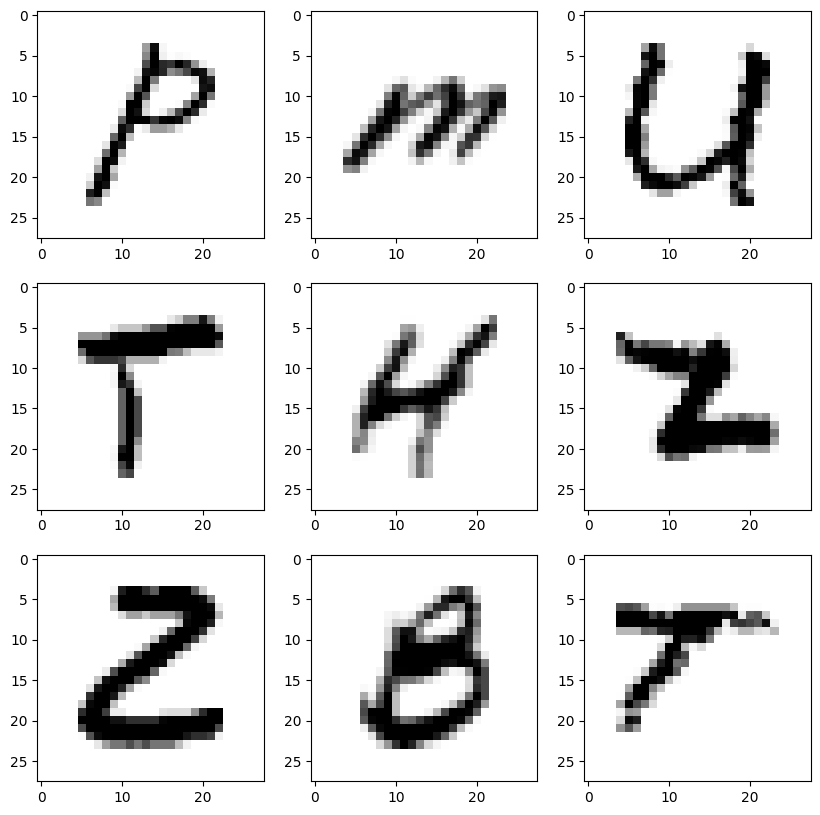

In [11]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [12]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of test data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [13]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape) #one hot encoding

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [10]:
# CNN model...

model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
# model1.add(MaxPool2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
# model1.add(MaxPool2D(pool_size=(2, 2), strides=2))

model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model1.add(MaxPool2D(pool_size=(2, 2), strides=2))

model1.add(Flatten())

model1.add(Dense(64,activation ="relu"))
model1.add(Dense(128,activation ="relu"))

model1.add(Dense(26,activation ="softmax"))

In [15]:
model1.compile(optimizer = Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [12]:
history = model1.fit(train_X, train_yOHE,batch_size=16,epochs=2,verbose=1,  validation_data = (test_X,test_yOHE))

Epoch 1/2
18623/18623 [==============================] - 2012s 108ms/step - loss: 0.1179 - accuracy: 0.9671 - val_loss: 0.0646 - val_accuracy: 0.9825
Epoch 2/2
18623/18623 [==============================] - 1270s 68ms/step - loss: 0.0500 - accuracy: 0.9859 - val_loss: 0.0438 - val_accuracy: 0.9884


In [ ]:
model1.save(r'model_hand.h5')

In [14]:
pred = model1.predict(test_X[:9])
print(test_X.shape)

NameError: name 'model1' is not defined

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [17]:
from keras.models import load_model

In [19]:
model=load_model('model_hand.h5')
img = cv2.imread(r'img_b.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "CHARACTER       Esc to exit ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Handwritten character recognition _ _ _ ', img)


while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 411ms/step
